In [324]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## IMPORTING THE COVID-19 DATA SET

In [18]:
country_wise = pd.read_csv('C:/Users/SUNU HEALTH NIGERIA/Downloads/covid data/country_wise_latest.csv')
clean_complete = pd.read_csv('C:/Users/SUNU HEALTH NIGERIA/Downloads/covid data/covid_19_clean_complete.csv')
day_wise = pd.read_csv('C:/Users/SUNU HEALTH NIGERIA/Downloads/covid data/day_wise.csv')
worldometer_data =  pd.read_csv('C:/Users/SUNU HEALTH NIGERIA/Downloads/covid data/worldometer_data.csv')



## CONDUCTIN EDA ON THE COUNTRY WISE DATA

In [26]:
country_wise.info()#Getting the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [30]:
country_wise.shape # to check for the number of columns and row

(187, 15)

country_wise.describe() #Generate descriptive statistics of the given data

In [34]:
country_wise.head() # this is the to check for the tip five columns 

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


## TOP 10 COUNTRIES WITH HIGHEST NUMBER OF CONFIRM CASES

In [84]:
top_10= country_wise.groupby('Country/Region', as_index = False)['Confirmed'].sum()
top_10= top_10.nlargest(10,'Confirmed').reset_index(drop = True)
top_10

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


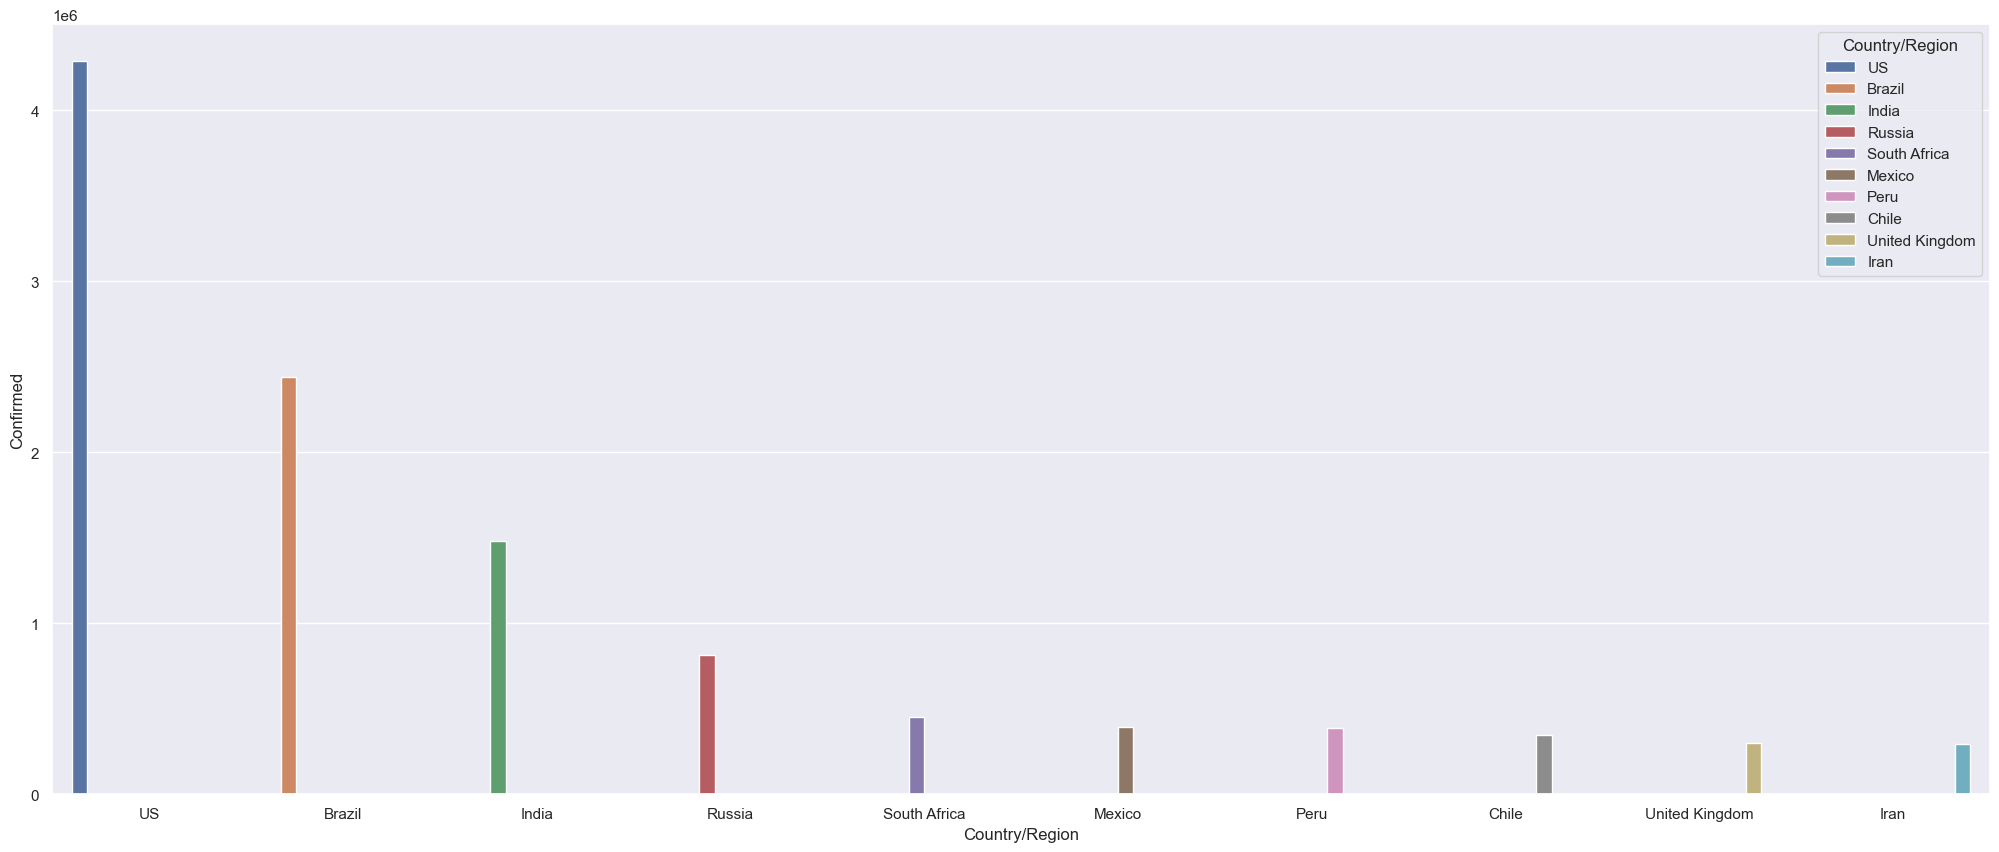

In [116]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="Country/Region",y="Confirmed",data=top_10,hue="Country/Region")
plt.show()

## ANALYSING THE TOP 10 COUNTRIES WITH THE HIGHEST NUMBER OF DEATH CASES

In [118]:
top_10= country_wise.groupby('Country/Region', as_index = False)['Deaths'].sum()
top_10= top_10.nlargest(10,'Deaths').reset_index(drop = True)
top_10

,Country/Region,Deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


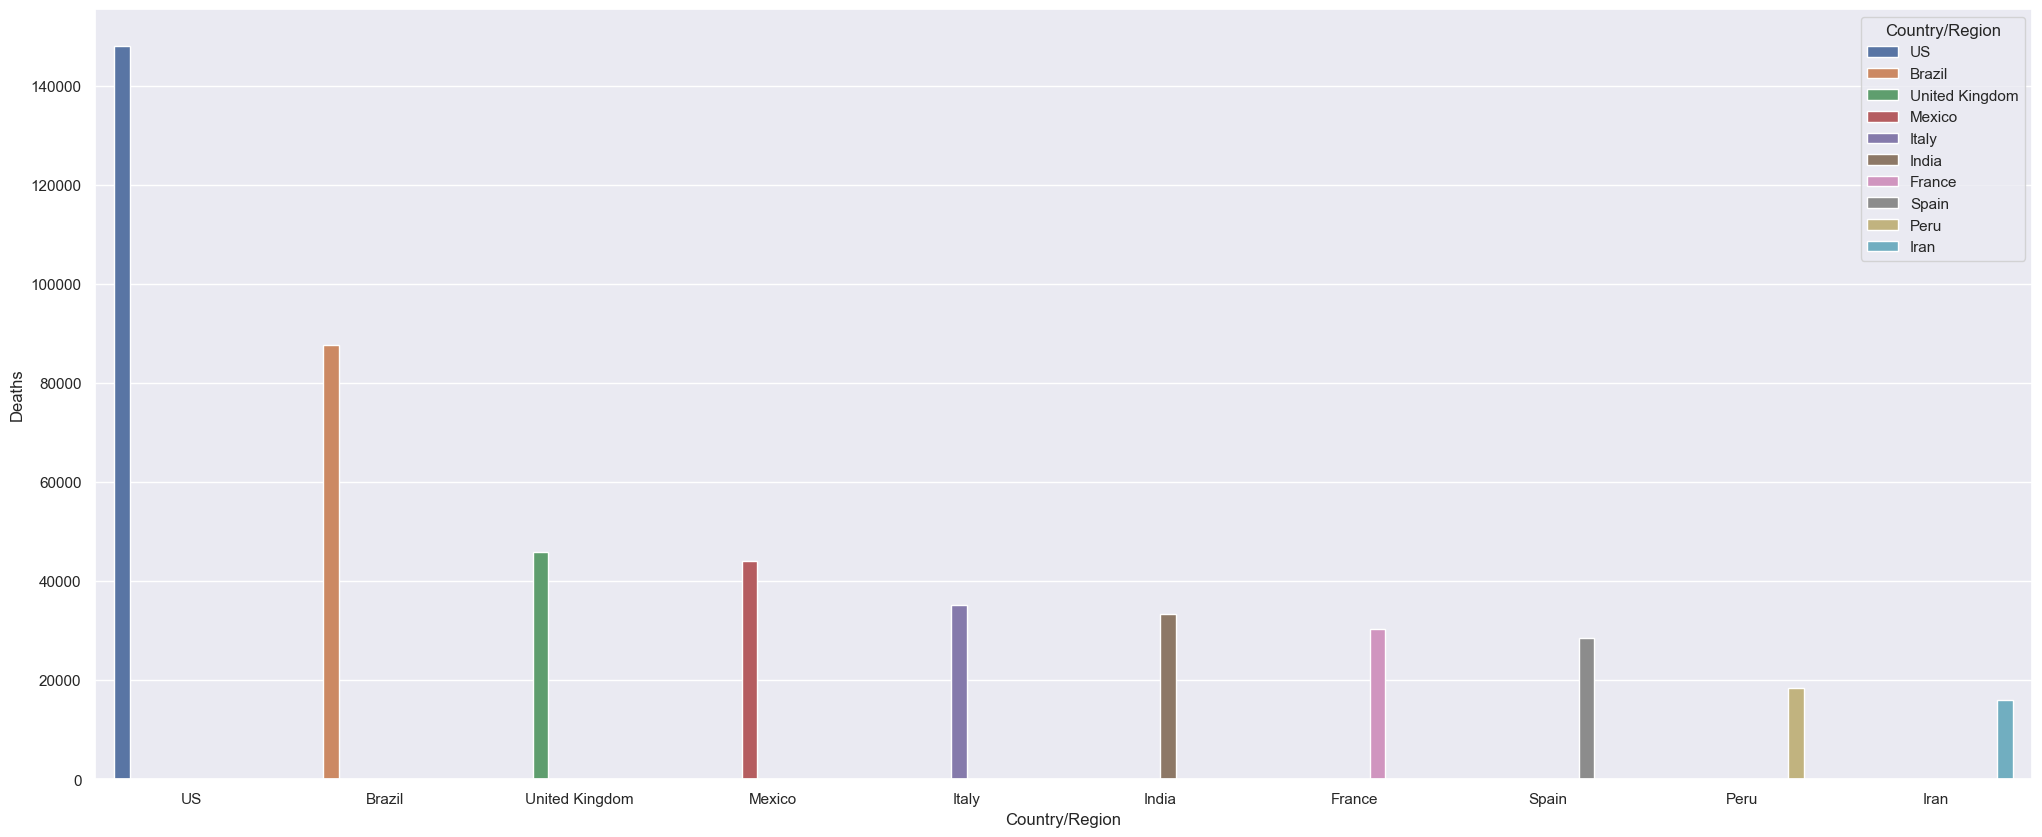

In [121]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="Country/Region",y="Deaths",data=top_10,hue="Country/Region")
plt.show()

## ANALYSING THE TOP 10 COUNTRIES WITH THE HIGHEST NUMBER OF RECOVERED CASES¶


In [126]:
top_10= country_wise.groupby('Country/Region', as_index = False)['Recovered'].sum()
top_10= top_10.nlargest(10,'Recovered').reset_index(drop = True)
top_10

,Country/Region,Recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


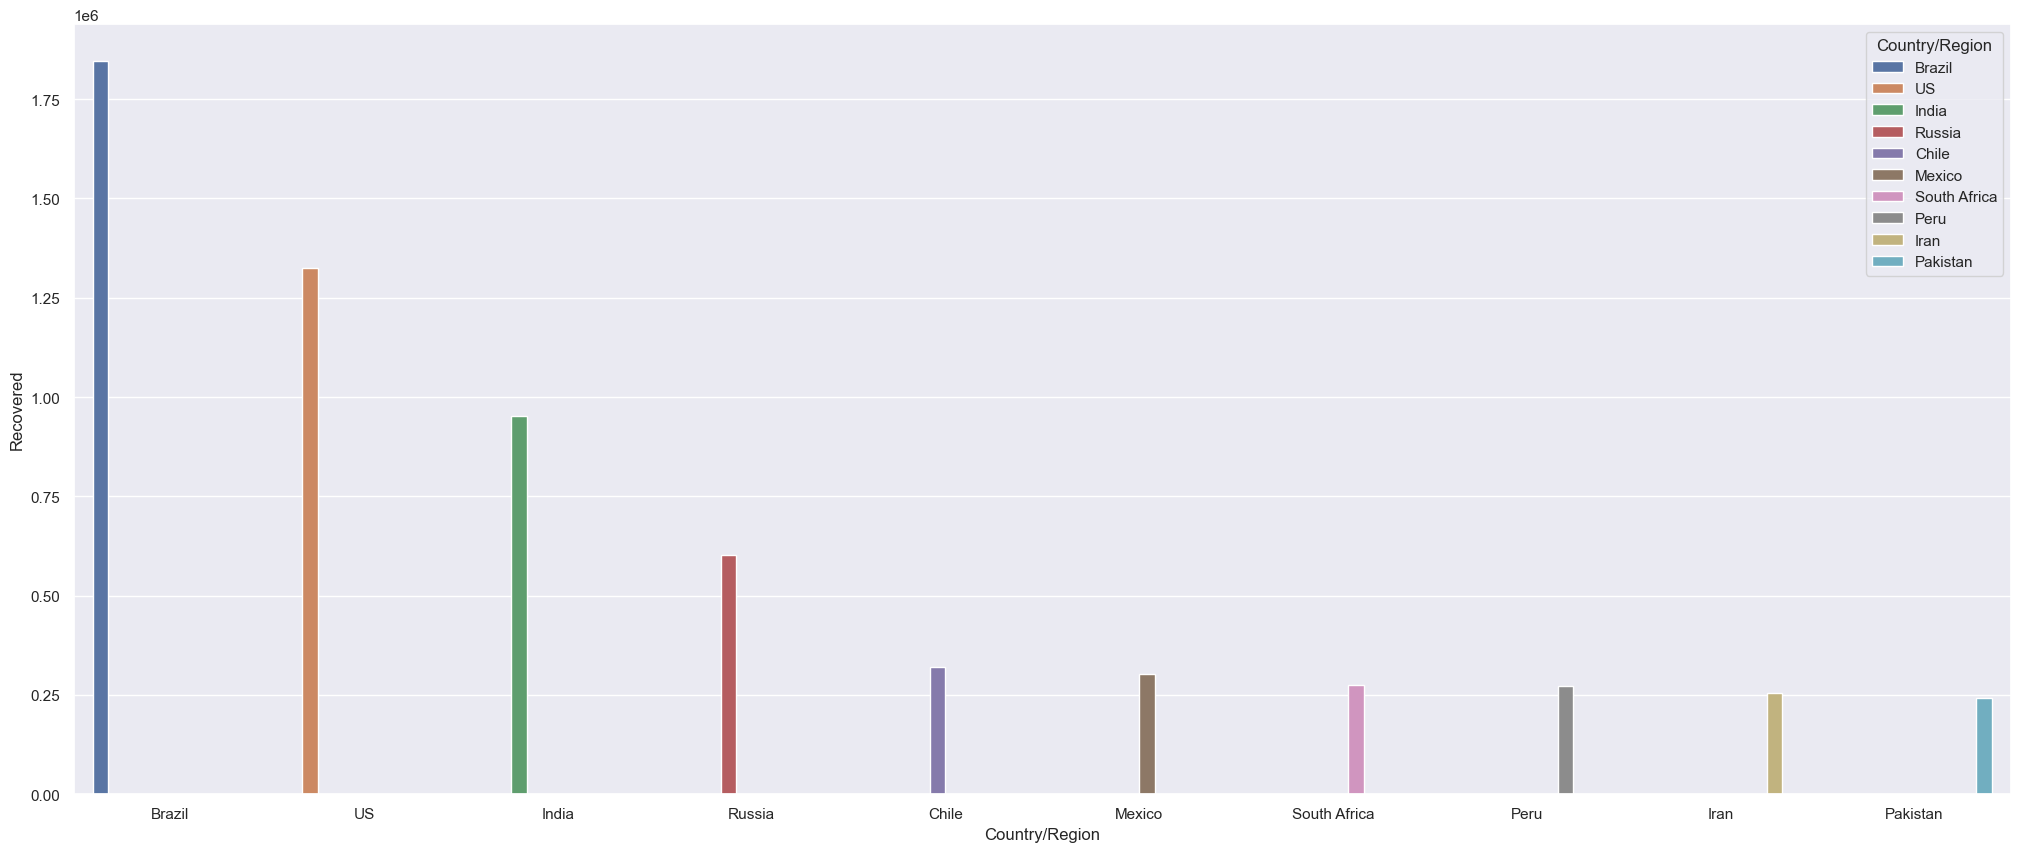

In [128]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="Country/Region",y="Recovered",data=top_10,hue="Country/Region")
plt.show()

## ANALYSING THE TOP 10 COUNTRIES WITH THE HIGHEST NUMBER OF ACTIVE CASES

In [133]:
top_10= country_wise.groupby('Country/Region', as_index = False)['Active'].sum()
top_10= top_10.nlargest(10,'Active').reset_index(drop = True)
top_10

,Country/Region,Active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


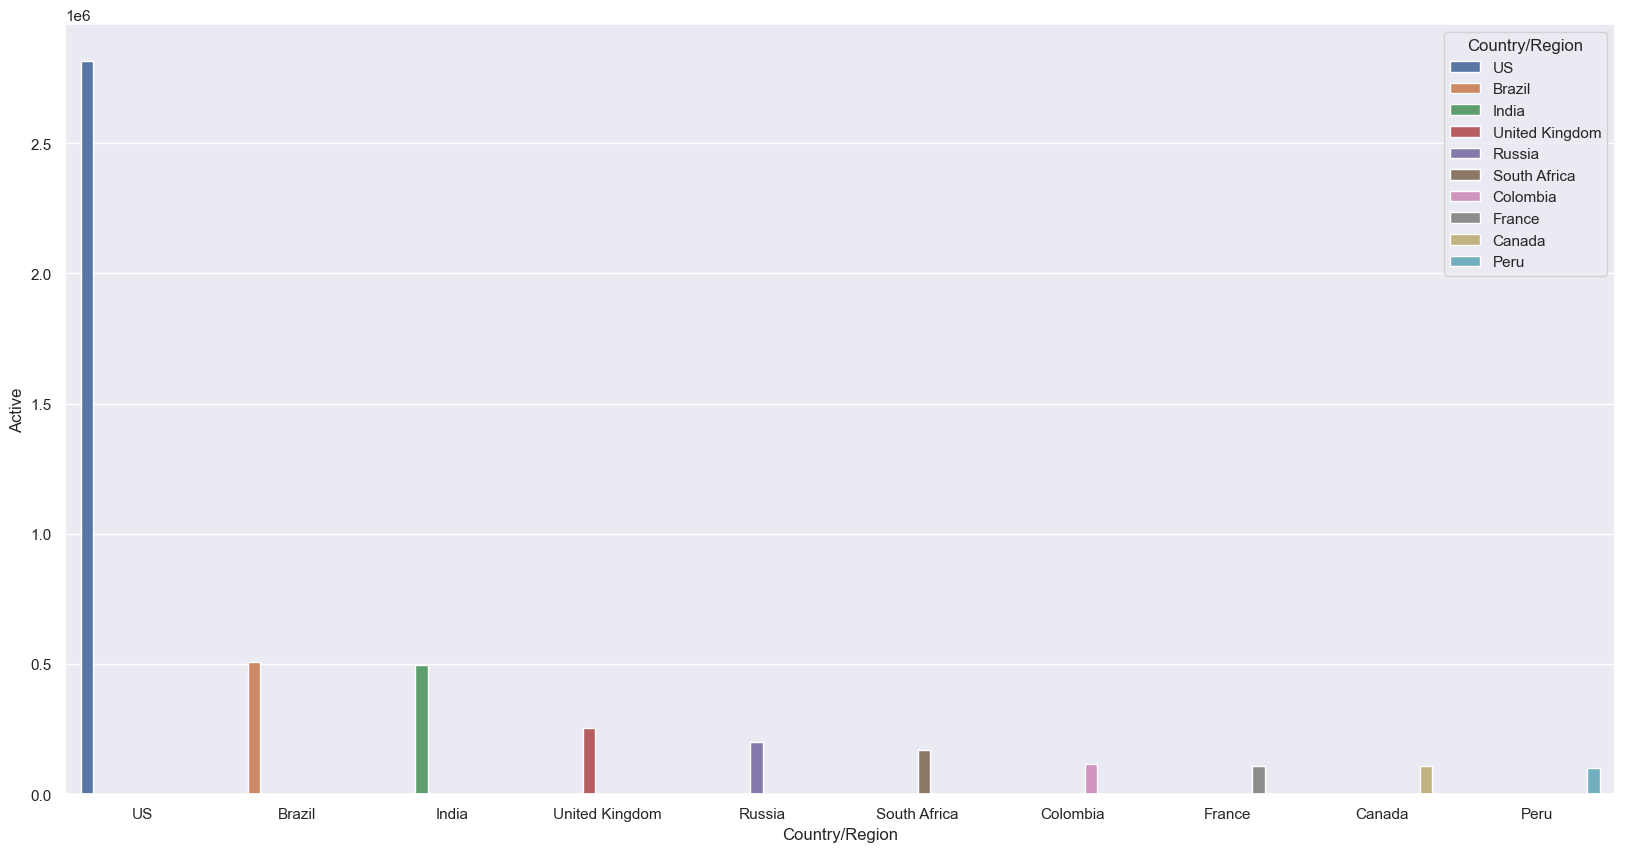

In [139]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Country/Region",y="Active",data=top_10,hue="Country/Region")
plt.show()

## CALCULATING THE TOTAL NUMBER OF COMFIRMED , DEATHS, RECOVERED AND ACTIVE CASES

In [34]:
# total_vital_data = confirmed cases, death cases, recovered cases, active cases
total_vital_data ={
    'Confirmed Cases': country_wise['Confirmed'].sum(),
    'Death Cases': country_wise['Deaths'].sum(),
    'Recovered Cases': country_wise['Recovered'].sum(),
    'Active Cases': country_wise['Active'].sum()
}
total_vital_data_df = pd.DataFrame(total_vital_data.items(),columns =['status', 'case count'])

total_vital_data_df

,status,case count
0,Confirmed Cases,16480485
1,Death Cases,654036
2,Recovered Cases,9468087
3,Active Cases,6358362


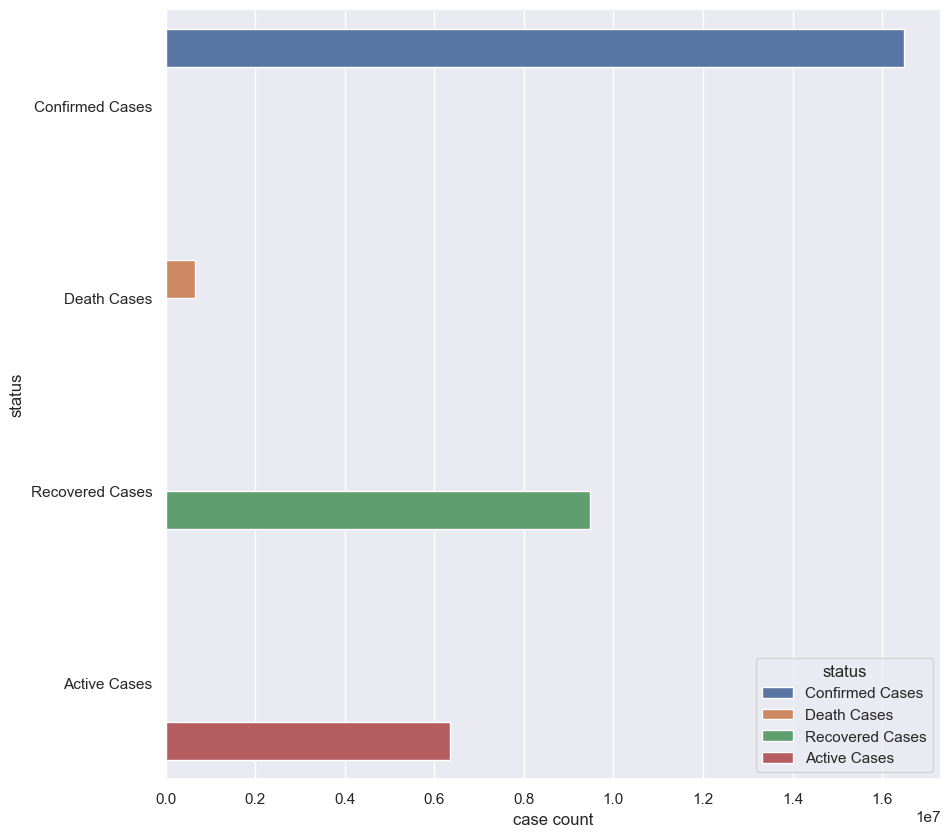

In [56]:
total_vital_data_df = pd.DataFrame(total_vital_data.items(),columns =['status', 'case count'])
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x="case count",y="status",data=total_vital_data_df,hue="status")
plt.show()

## CONDUCTIN EDA ON THE DAY_WISE DATA

In [70]:
day_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


The column 'Date' has dtype as object let's format it to datetime

In [184]:
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
print(day_wise['Date'].dtype)

datetime64[ns]


In [186]:
day_wise.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Previous_Confirmed,Daily_Growth_Rate,Mortality_Ratio
count,188,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,1.870000e+02,188.000000,188.000000
mean,2020-04-24 12:00:00,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064,4.342396e+06,6.019959,4.860771
min,2020-01-22 00:00:00,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000,5.550000e+02,0.000000,2.040300
25%,2020-03-08 18:00:00,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000,1.112160e+05,1.790793,3.507132
50%,2020-04-24 12:00:00,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000,2.806267e+06,2.291362,4.848077
75%,2020-06-10 06:00:00,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000,7.320504e+06,5.819450,6.294663
max,2020-07-27 00:00:00,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000,1.625180e+07,90.570550,7.181413
std,NaN,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979,4.687458e+06,10.243165,1.579520


In [78]:
day_wise.shape#this is to check the number or rows and collumns

(188, 12)

In [75]:
day_wise.isnull().sum()# this is to check the number of missing values in the data set

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

## ANALYSING THE TOTAL NUMBER OF NEW CASES, NEW DEATHS AND NEW RECOVERED

In [91]:
total_vital_data2 ={
    'New Confirmed Cases': day_wise['New cases'].sum(),
    'New Death Cases': day_wise['New deaths'].sum(),
    'New Recovered Cases': day_wise['New recovered'].sum(),
}
total_vital_data2_df = pd.DataFrame(total_vital_data2.items(),columns =['status', 'case count'])

total_vital_data2_df

,status,case count
0,New Confirmed Cases,16500952
1,New Death Cases,654019
2,New Recovered Cases,9468059


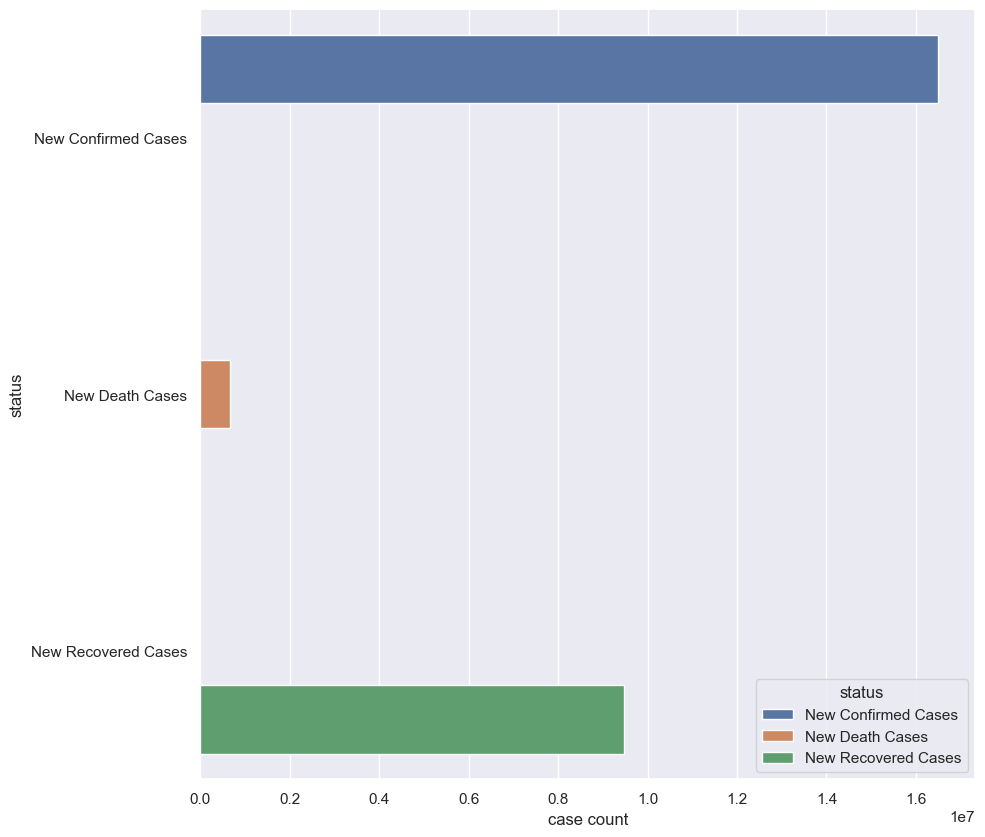

In [95]:
total_vital_data2_df = pd.DataFrame(total_vital_data2.items(),columns =['status', 'case count'])
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x="case count",y="status",data=total_vital_data2_df,hue="status")
plt.show()

##  the top 5 countries withe the highest new cases

In [106]:
top_5= day_wise.groupby('No. of countries', as_index = False)['New cases'].sum()
top_5= top_5.nlargest(10,'New cases').reset_index(drop = True)
top_5

,No. of countries,New cases
0,187,12219446
1,184,1615808
2,186,1081989
3,183,319945
4,180,245017
5,176,191634
6,179,152630
7,182,71718
8,177,64639
9,175,62960


## Calculate Daily Growth Rate (percentage increase from the previous day)

In [121]:
day_wise['Previous_Confirmed'] = day_wise['Confirmed'].shift(1)
day_wise['Daily_Growth_Rate'] = ((day_wise['Confirmed'] - day_wise['Previous_Confirmed']) / day_wise['Previous_Confirmed']).fillna(0) * 100

## Calculate Mortality Ratio (Death Rate)

In [125]:
day_wise['Mortality_Ratio'] = (day_wise['Deaths'] / day_wise['Confirmed']).fillna(0) * 100

## Display the enriched DataFrame with new features

In [141]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Previous_Confirmed,Daily_Growth_Rate,Mortality_Ratio
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,NaN,0.000000,3.063063
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,555.0,17.837838,2.752294
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,654.0,43.883792,2.763018
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,941.0,52.391073,2.928870
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,1434.0,47.698745,2.644004


## VISUALYSING THE DAILY GROWTH RATE AND THE DAILY MORTALITY RATE

In [146]:
selected_columns = day_wise[['Daily_Growth_Rate','Mortality_Ratio']]
print(selected_columns)


     Daily_Growth_Rate  Mortality_Ratio
0             0.000000         3.063063
1            17.837838         2.752294
2            43.883792         2.763018
3            52.391073         2.928870
4            47.698745         2.644004
..                 ...              ...
183           1.856850         4.084374
184           1.812736         4.050560
185           1.618229         4.016385
186           1.275027         3.991073
187           1.407161         3.968548

[188 rows x 2 columns]


In [148]:
selected_columns = selected_columns.head()

,Daily_Growth_Rate,Mortality_Ratio
0,0.000000,3.063063
1,17.837838,2.752294
2,43.883792,2.763018
3,52.391073,2.928870
4,47.698745,2.644004


## Plotting the pie chart

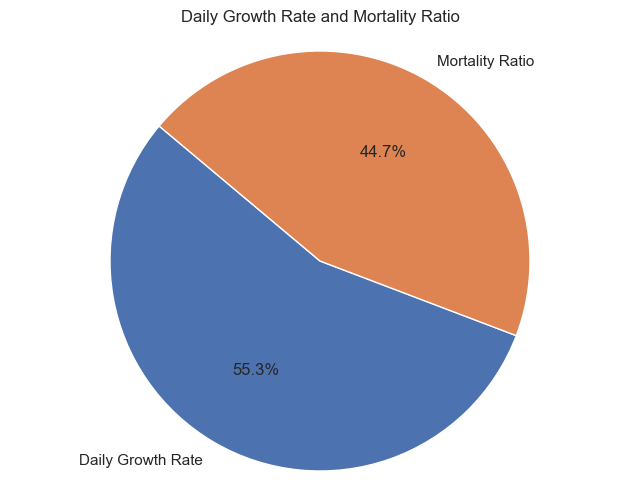

In [209]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(selected_columns[['Daily_Growth_Rate', 'Mortality_Ratio']].sum(), 
        labels=['Daily Growth Rate', 'Mortality Ratio'], 
        autopct='%1.1f%%', startangle=140)
plt.title('Daily Growth Rate and Mortality Ratio')  # Title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()  # Display the pie chart

## 

## ANALYSING THE GLOBAL TREND OF COVID 19 AND HOW IT HAS ENVOLED OVERTIME

In [214]:
grouped_data_dates = day_wise.groupby('Date').agg({'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum',
                                               'Active':'sum',
                                               'New cases':'sum',
                                               'New deaths':'sum',
                                               'New recovered':'sum'}).reset_index()
grouped_data_dates.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623


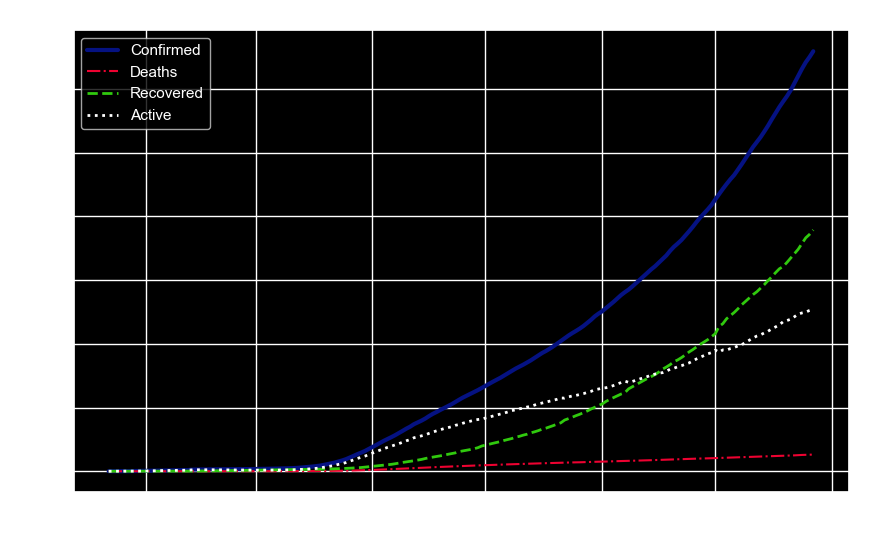

In [218]:
plt.figure(figsize = (10,6))
plt.style.use('dark_background')
# Plotting Confirmed cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Confirmed'],linestyle = '-',color = '#051282',label = 'Confirmed',lw = 3)
# Plotting Deaths
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Deaths'],linestyle = '-.',color = '#ed0231',label = 'Deaths')
# Plotting Recovered cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Recovered'],linestyle = '--',color = '#30c90e',label = 'Recovered',lw = 2)
# Plotting active cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Active'],linestyle = ':',color = 'w',label = 'Active',lw = 2)
plt.xlabel('Date')
plt.ylabel('No: of cases (in millions)')
plt.title('Global Trend of Covid Cases')
plt.legend()
plt.show()

COMMMENTS



## CONDUCTING EDA ON THE WORLDDOMETER_DATA

In [245]:
worldometer_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [162]:
worldometer_data.shape

(209, 16)

In [164]:
worldometer_data.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [176]:
worldometer_data.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [202]:
clean_real=['NewCases','TotalDeaths','NewDeaths','NewRecovered','TotalRecovered','ActiveCases',
      'Serious,Critical','Deaths/1M pop','TotalTests','Tests/1M pop', 'Continent', 'Population','Tot Cases/1M pop']
worldometer_data[clean_real]=worldometer_data[clean_real].fillna(0)
worldometer_data['WHO Region'] = worldometer_data['WHO Region'].fillna('')
worldometer_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe


In [194]:
worldometer_data.duplicated().sum()

0

In [206]:
worldometer_data.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

## ANALYSING IF THERE IS A CORRELATION BETWEEN CONFIRMED, DEATHS,RECOVERED AND ACTIVE CASES

In [258]:
numeric_columns = ['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
Correlation_matrix =  worldometer_data[numeric_columns].corr()
Correlation_matrix

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
Population,1.000000,0.546284,0.435269,0.589550,0.458732
TotalCases,0.546284,1.000000,0.938939,0.982651,0.966945
TotalDeaths,0.435269,0.938939,1.000000,0.903282,0.897461
TotalRecovered,0.589550,0.982651,0.903282,1.000000,0.914581
ActiveCases,0.458732,0.966945,0.897461,0.914581,1.000000


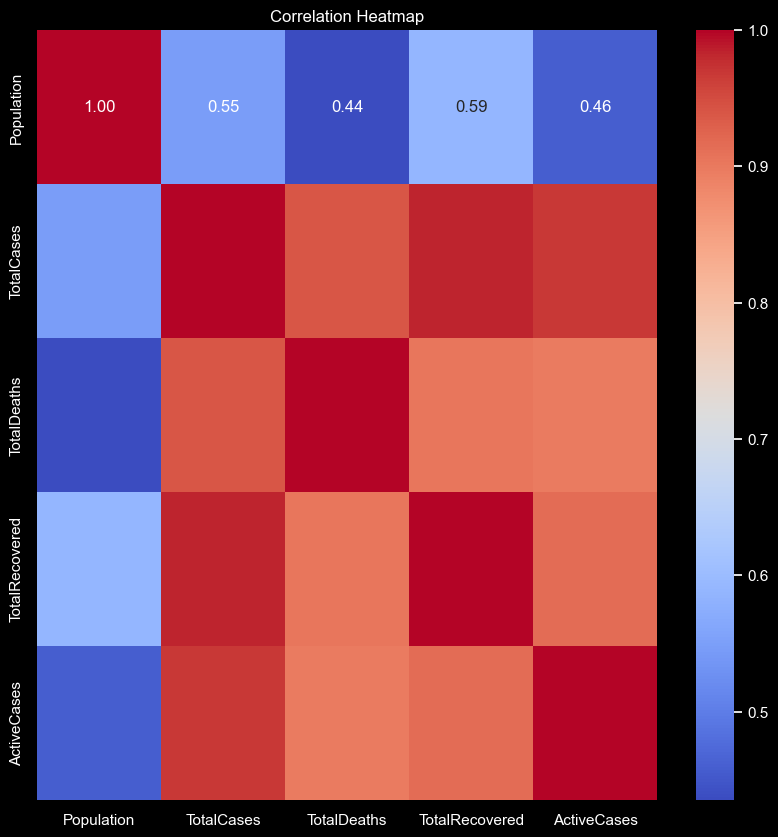

In [262]:
#plot correlation map 
plt.style.use('dark_background')
sns.heatmap(Correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

## BUILDING MACHINE LEARNING FOR FURTURE PREDICTIONS USING THE WORLDOMETER_DATA

# Feature Selection

In [275]:
# LET'S use a simple linear regression model for building the model.
# Selecting features for modeling
X = worldometer_data[['Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']]#feautures
y = worldometer_data['TotalCases']#target

# Normalize using Min-Max Scaling

In [312]:
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(X)

## Model Training


# Split the dataset into training and testing sets (using Min-Max scaled features )

In [314]:
X_train, X_test, y_train, y_test = train_test_split(features_min_max_scaled, y, test_size=0.2, random_state=42)

# Create and train the model

In [316]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##  Make predictions

In [318]:
predictions = model.predict(X_test)

# Model Evaluation

In [320]:
#Evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared.
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1624002018.4177012
R-squared: 0.7381891212802277


## Model Interpretation

In [329]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                 Coefficient
Population      6.696538e+04
TotalDeaths     5.827082e+05
TotalRecovered  2.332009e+06
ActiveCases     2.097502e+06


## VISUALISING THE RESULTS OF THE MODEL


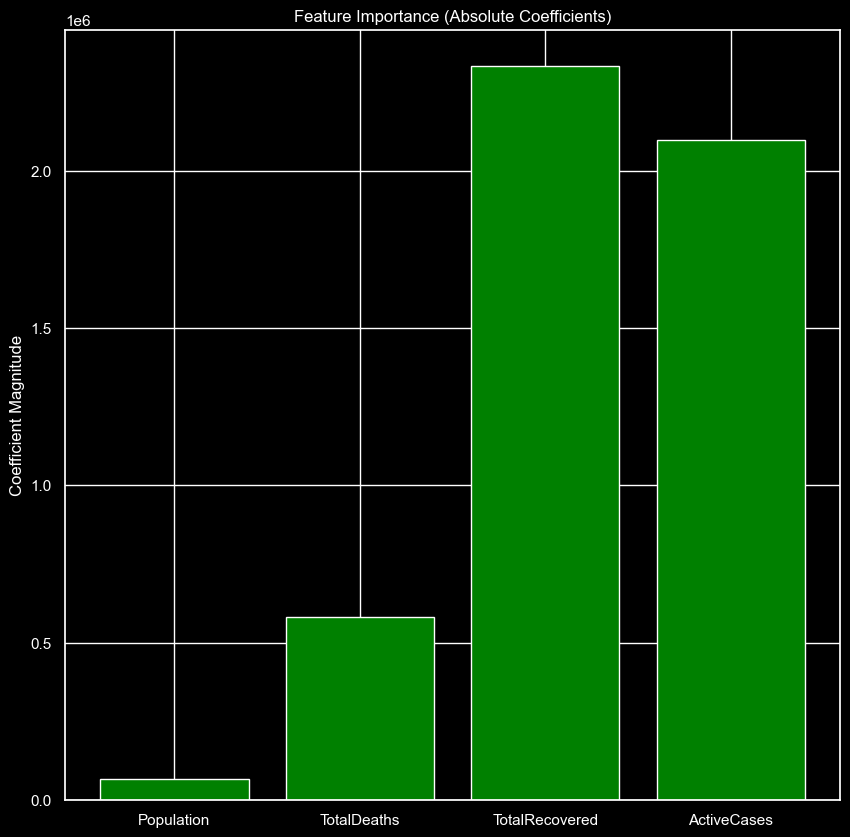

In [338]:
features = ['Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
coefficients = [6.696538e+04,5.827082e+05, 2.332009e+06, 2.097502e+06,]
abs_coefficients = [abs(c) for c in coefficients]

plt.bar(features, abs_coefficients, color='green')
plt.title('Feature Importance (Absolute Coefficients)')
plt.ylabel('Coefficient Magnitude')
plt.show()

INTERPRETATION OF THE BAR CHAT
As can be seen from the bar chart above, the feature totalRecovered with the  coefficient 2.332009e+06 contributed the most in predicting the target variable. Followed by the TotalRecovered.

## INTERPRETATION OF RESULTS

R-squared (R²)

Value: 0.7382
    
Interpretation:
 R² measures the proportion of variance in the dependent variable (TotalCases) that can be explained by the independent variables (Population, TotalDeaths, TotalRecovered, ActiveCases).
An R² value of approximately 0.7382 means that about 73.82% of the variance in TotalCases can be explained by your model's features.
This indicates a reasonably good fit for your model since values closer to 1 suggest a better fit. However:
It also suggests that there is still around 26.18% of the variance in TotalCases that is not explained by the model. This unexplained variance may be due to factors not included in your analysis or inherent variability in COVID-19 case reporting


Mean Squared Error (MSE)

Value: 1,624,002,018.42 (approximately 1.62 billion)
Interpretation:
 MSE quantifies how well the model's predictions match the actual data by averaging the squares of the errors (the differences between predicted and actual values).
A high MSE indicates that there are significant discrepancies between predicted values and actual values. In this case, an MSE of approximately 1.62 billion suggests that, on average, the squared differences between predicted TotalCases and actual TotalCases are quite large.
This could imply:
The model may not be accurately capturing the relationship between the features and TotalCases.
 There might be significant variability in TotalCases that is not accounted for by the model.
 The presence of outliers or extreme values in your dataset could also inflate the MSE.

